#**Import Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.optimizers import Adam
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


#**Import Data**

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
census_income = fetch_ucirepo(id=20)

# data (as pandas dataframes)
X = census_income.data.features
y = census_income.data.targets

# metadata
print(census_income.metadata)

# variable information
print(census_income.variables)


{'uci_id': 20, 'name': 'Census Income', 'repository_url': 'https://archive.ics.uci.edu/dataset/20/census+income', 'data_url': 'https://archive.ics.uci.edu/static/public/20/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data.  Also known as Adult dataset.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Sep 09 2024', 'dataset_doi': '10.24432/C5GP7S', 'creators': ['Ron Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && 

#**Data Preprocessing and Splitiing**

In [ ]:
# Load dataset
data = pd.read_csv('adult.data', header=None)

# Feature names
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
           'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
           'hours_per_week', 'native_country', 'income']

# Assign column names
data.columns = columns

# Handle missing values (if any)
data.replace(' ?', pd.NA, inplace=True)
data.dropna(inplace=True)

# Encode categorical variables (Label Encoding)
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split data into features (X) and target (y)
X = data.drop('income', axis=1)
y = data['income']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#**Build and train Decision Tree, Random Forest and ANN Models**

In [ ]:
# 1. Build and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Decision Tree Predictions and Evaluation
dt_preds = dt_model.predict(X_test)
dt_proba = dt_model.predict_proba(X_test)[:, 1]

# 2. Build and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Random Forest Predictions and Evaluation
rf_preds = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]

# 3. Build and train the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dropout(0.2),  # Regularization
    Dense(64, activation='relu'),  # Hidden layer 1
    Dropout(0.2),  # Regularization
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with an optimizer, loss function, and accuracy as a metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on training data
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the ANN model
ann_loss, ann_accuracy = ann_model.evaluate(X_test, y_test)
ann_proba = ann_model.predict(X_test).ravel()
ann_preds = (ann_proba > 0.5).astype(int)

# Predict on the test set
ann_preds = (model.predict(X_test) > 0.5).astype(int)



# Function to calculate and display metrics
def evaluate_model(y_true, y_pred, y_proba=None, model_name="Model"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_proba) if y_proba is not None else "N/A"

    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {auc if auc != 'N/A' else 'Not Applicable'}\n")



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7758 - loss: 0.4544 - val_accuracy: 0.8338 - val_loss: 0.3534
Epoch 2/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8324 - loss: 0.3559 - val_accuracy: 0.8409 - val_loss: 0.3403
Epoch 3/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8320 - loss: 0.3537 - val_accuracy: 0.8410 - val_loss: 0.3396
Epoch 4/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8373 - loss: 0.3347 - val_accuracy: 0.8471 - val_loss: 0.3331
Epoch 5/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8381 - loss: 0.3370 - val_accuracy: 0.8453 - val_loss: 0.3320
Epoch 6/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8446 - loss: 0.3210 - val_accuracy: 0.8459 - val_loss: 0.3336
Epoch 7/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8459 - loss: 0.3270 - val_accuracy: 0.8468 - val_loss: 0.3319
Epoch 8/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8443 - loss: 0.3330 - val_accuracy: 0.8478 - val_

#**Evaluate Models Performance**

In [ ]:
# Evaluate Decision Tree
evaluate_model(y_test, dt_preds, dt_proba, model_name="Decision Tree")

# Evaluate Random Forest
evaluate_model(y_test, rf_preds, rf_proba, model_name="Random Forest")

# Evaluate ANN
evaluate_model(y_test, ann_preds, ann_proba, model_name="Artificial Neural Network")

Metrics for Decision Tree:
Accuracy: 0.7996
Precision: 0.5951
Recall: 0.6107
F1-Score: 0.6028
AUC: 0.736468442454998

Metrics for Random Forest:
Accuracy: 0.8506
Precision: 0.7410
Recall: 0.6147
F1-Score: 0.6719
AUC: 0.902800529063851

Metrics for Artificial Neural Network:
Accuracy: 0.8481
Precision: 0.7465
Recall: 0.5902
F1-Score: 0.6592
AUC: 0.9190929946723737



#**Training and Validation Accuracy and Loss for ANN**

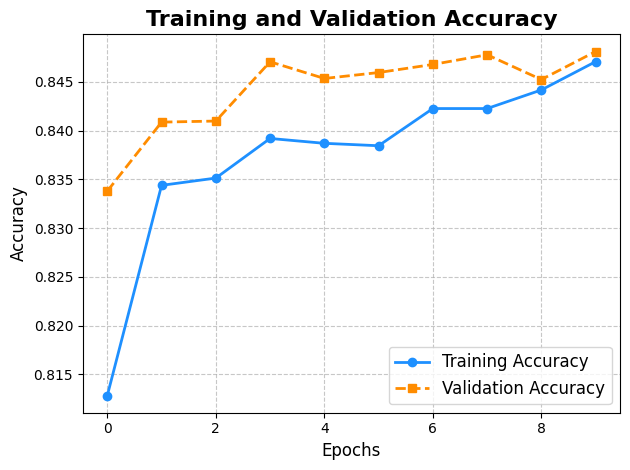

In [ ]:

# Plot Training Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='dodgerblue', linewidth=2, linestyle='-', marker='o', markersize=6)

# Plot Validation Accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='darkorange', linewidth=2, linestyle='--', marker='s', markersize=6)

# Title and Labels
plt.title('Training and Validation Accuracy', fontsize=16, weight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Customize the grid and layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Add annotations for better clarity (with the line coming from the downside)
min_val_accuracy_epoch = np.argmin(history.history['val_accuracy'])
min_val_accuracy = min(history.history['val_accuracy'])


# Show the plot
plt.tight_layout()
plt.show()



#**Training and Validation Loss Plot for ANN**

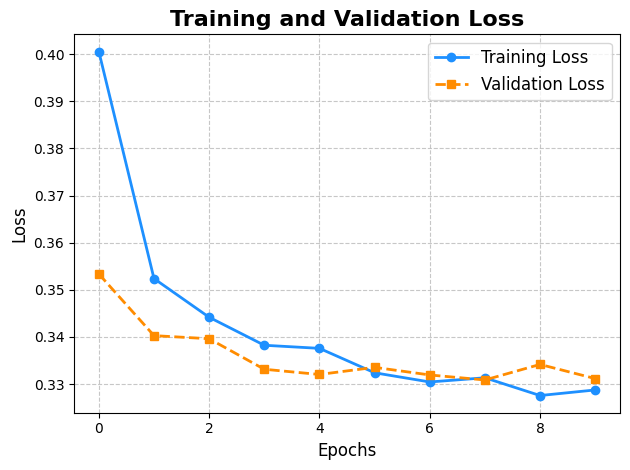

In [ ]:


# Plot Training Loss
plt.plot(history.history['loss'], label='Training Loss', color='dodgerblue', linewidth=2, linestyle='-', marker='o', markersize=6)

# Plot Validation Loss
plt.plot(history.history['val_loss'], label='Validation Loss', color='darkorange', linewidth=2, linestyle='--', marker='s', markersize=6)


# Title and Labels
plt.title('Training and Validation Loss', fontsize=16, weight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)

# Customize the grid and layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Add annotations for better clarity (optional)
min_val_loss_epoch = np.argmin(history.history['val_loss'])
min_val_loss = min(history.history['val_loss'])


# Show the plot
plt.tight_layout()
plt.show()


#**Models Accuracy Comparison (Bar Chart)**

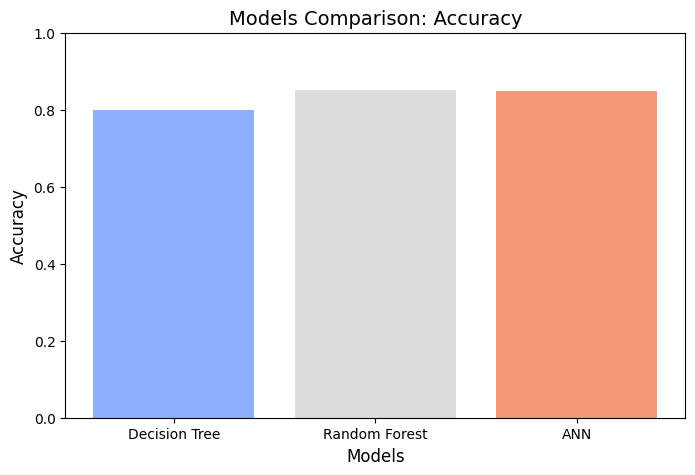

In [ ]:
import matplotlib.pyplot as plt

# Models and their respective accuracies
models = ['Decision Tree', 'Random Forest', 'ANN']
dt_accuracy = accuracy_score(y_test, dt_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)
ann_test_accuracy = accuracy_score(y_test, ann_preds)
accuracies = [dt_accuracy, rf_accuracy, ann_test_accuracy]  # Accuracy values

# Create the bar plot to compare accuracies
plt.figure(figsize=(8, 5))
import seaborn as sns
plt.bar(models, accuracies, color=sns.color_palette("coolwarm", 3))
# or try other palettes like "magma", "plasma", "inferno", "cividis"
plt.title('Models Comparison: Accuracy', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.show()


#**Models Accuracy Comparison (Pie Chart)**

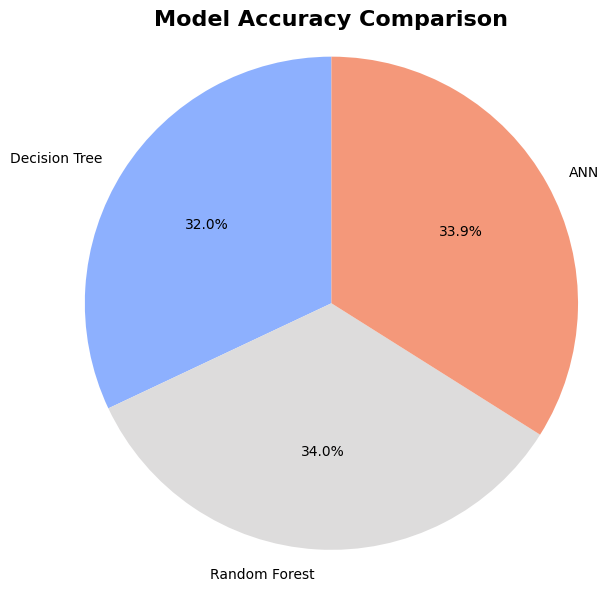

In [ ]:
# Model accuracy comparison
accuracies = [accuracy_score(y_test, dt_preds), accuracy_score(y_test, rf_preds), accuracy_score(y_test, ann_preds)]
models = ['Decision Tree', 'Random Forest', 'ANN']

plt.figure(figsize=(7, 7))
plt.pie(accuracies, labels=models, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette("coolwarm", len(models)))
plt.title('Model Accuracy Comparison', fontsize=16, weight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


#**Confusion Matrix Comparison**

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
dt_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


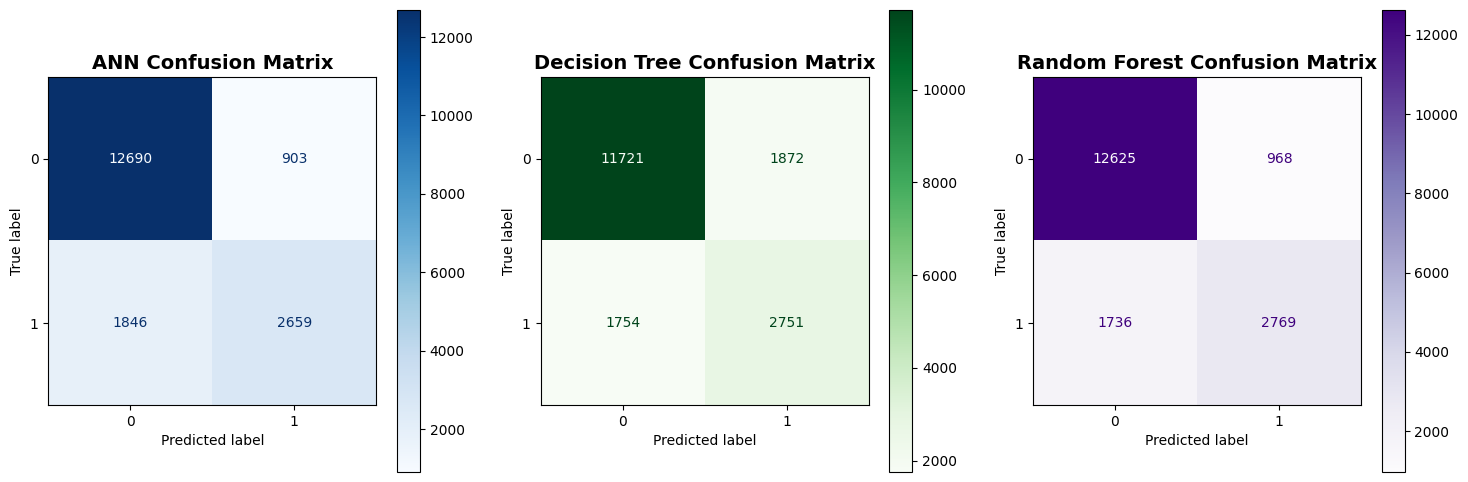

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Assuming ann_preds are the predictions from your ANN model
ann_predictions = (model.predict(X_test) > 0.5).astype(int) # Define ann_predictions

# Assuming dt_clf is your Decision Tree Classifier
dt_model = dt_clf # Define dt_model
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test, ax=ax[1], cmap='Greens')
ax[1].set_title("Decision Tree Confusion Matrix", fontsize=14, weight='bold')

# Assuming rf_clf is your Random Forest Classifier
rf_model = rf_clf # Define rf_model
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, ax=ax[2], cmap='Purples')
ax[2].set_title("Random Forest Confusion Matrix", fontsize=14, weight='bold')

ConfusionMatrixDisplay.from_predictions(y_test, ann_predictions, ax=ax[0], cmap='Blues')
ax[0].set_title("ANN Confusion Matrix", fontsize=14, weight='bold')

plt.show() # Add plt.show() to display the plots

#**Decision Tree Visualization**

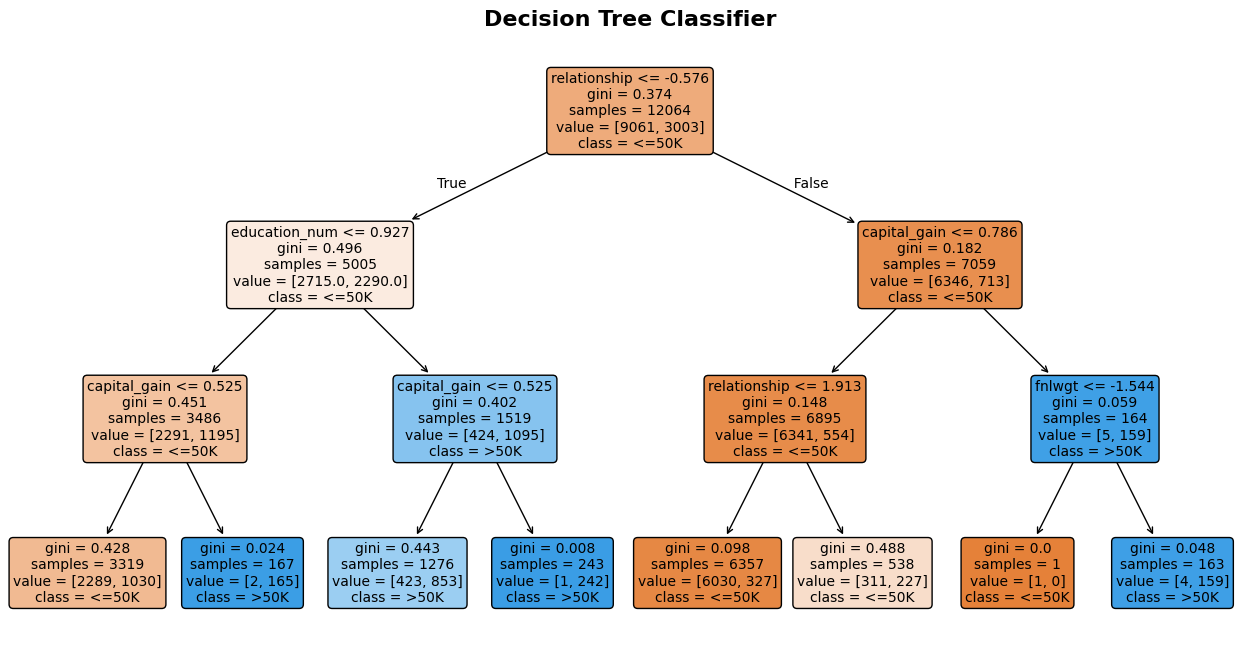

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train a smaller Decision Tree by limiting depth and min_samples_split
dt_clf_simplified = DecisionTreeClassifier(max_depth=3, min_samples_split=20, random_state=42)
dt_clf_simplified.fit(X_train, y_train)

# Plot the simplified tree
plt.figure(figsize=(16, 8))  # Adjust size as needed
plot_tree(dt_clf_simplified, filled=True, feature_names=X.columns, class_names=['<=50K', '>50K'], rounded=True, fontsize=10)
plt.title("Decision Tree Classifier", fontsize=16, weight='bold')
plt.show()

#**Compare ANN Architectures**

In [ ]:
from IPython.display import display
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Function to create and train an ANN model
def create_and_train_model(layers, neurons, X_train, y_train, X_test, y_test):
    model = Sequential()

    # Input layer
    model.add(Dense(neurons[0], activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.2))

    # Hidden layers
    for n in neurons[1:]:
        model.add(Dense(n, activation='relu'))
        model.add(Dropout(0.2))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

    # Evaluate the model
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)

    return accuracy

# Different architectures to compare
architectures = [
    {"layers": 1, "neurons": [64]},
    {"layers": 1, "neurons": [128]},
    {"layers": 2, "neurons": [64, 32]},
    {"layers": 2, "neurons": [128, 64]},
    {"layers": 3, "neurons": [64, 32, 16]},
    {"layers": 3, "neurons": [128, 64, 32]},
]

# Store the results
results = []

# Train and evaluate each model with different architecture
for arch in architectures:
    accuracy = create_and_train_model(arch['layers'], arch['neurons'], X_train, y_train, X_test, y_test)
    results.append({"Architecture": f"{arch['layers']} Layers, Neurons: {arch['neurons']}", "Accuracy": accuracy})

# Create a DataFrame for the comparison
comparison_df = pd.DataFrame(results)

# Display the DataFrame (use pandas' built-in display)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
comparison_df



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


,Architecture,Accuracy
0,"1 Layers, Neurons: [64]",0.845342
1,"1 Layers, Neurons: [128]",0.842414
2,"2 Layers, Neurons: [64, 32]",0.846392
3,"2 Layers, Neurons: [128, 64]",0.846060
4,"3 Layers, Neurons: [64, 32, 16]",0.847773
5,"3 Layers, Neurons: [128, 64, 32]",0.847829


<Figure size 1000x600 with 0 Axes>

#**Feature Importance of Random Forest**

#Bar Chart

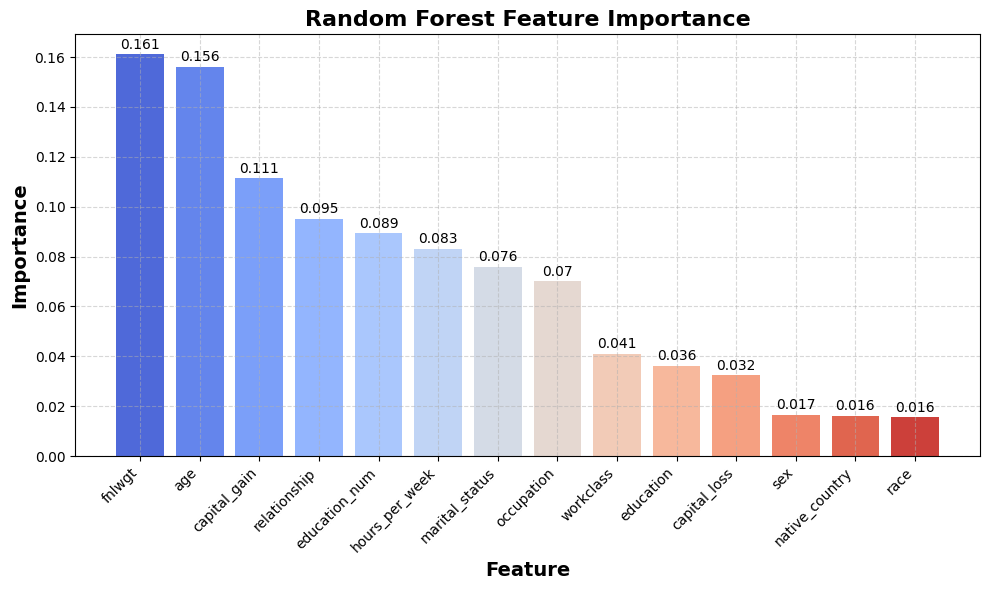

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Feature importance for Random Forest
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Create the figure for feature importance
plt.figure(figsize=(10, 6))

# Use a distinct color palette for the bars
colors = sns.color_palette("coolwarm", len(X.columns))

# Create the bar chart
bars = plt.bar(range(X_train.shape[1]), importances[indices], align="center", color=colors)

# Rotate the feature names on the x-axis for better readability
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=45, ha='right')

# Add labels and title with improved font properties
plt.xlabel('Feature', fontsize=14, weight='bold')
plt.ylabel('Importance', fontsize=14, weight='bold')
plt.title('Random Forest Feature Importance', fontsize=16, weight='bold')

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Add value labels above each bar for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.001, round(yval, 3), ha='center', va='bottom', fontsize=10)

# Tight layout to ensure labels do not overlap
plt.tight_layout()

# Show the plot
plt.show()




#Pie Chart

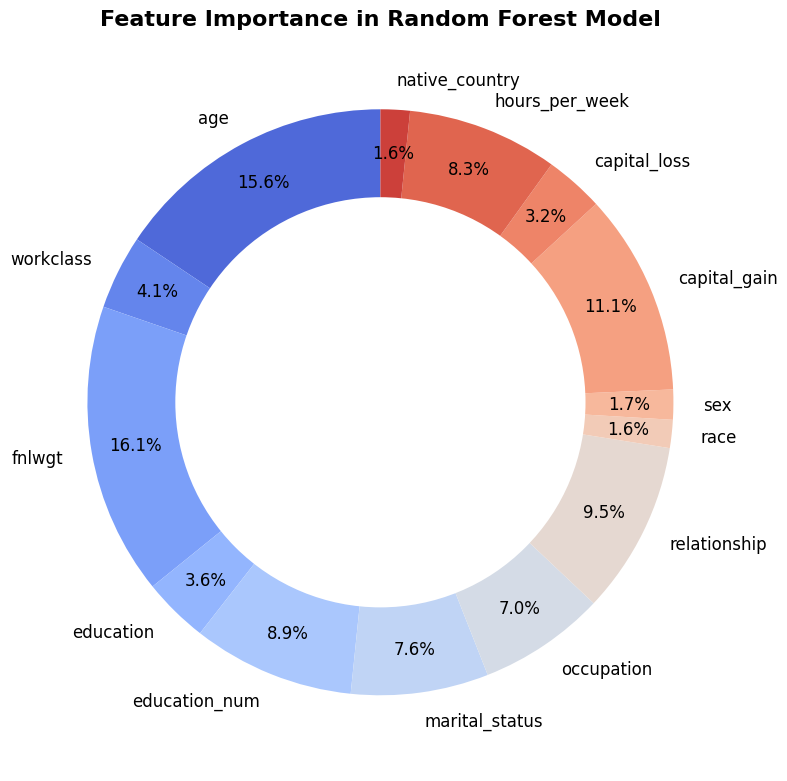

In [ ]:
# Feature importance for Random Forest
importances = rf_clf.feature_importances_
features = X.columns

# Create a pie chart for feature importance with the "outclass" style
plt.figure(figsize=(8, 8))

# Using a color palette from Seaborn for better visual aesthetics
colors = sns.color_palette("coolwarm", len(features))

# Create the pie chart
plt.pie(importances, labels=features, autopct='%1.1f%%', startangle=90,
        colors=colors, wedgeprops={'edgecolor': 'none'},  # Removed black borders
        textprops={'fontsize': 12, 'color': 'black'},
        pctdistance=0.85)  # Adjust the distance of percentage labels from the center

# Add a title with improved font properties
plt.title('Feature Importance in Random Forest Model', fontsize=16, weight='bold')

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Add a center circle to make it look like a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Show the plot
plt.tight_layout()
plt.show()


#**Feature Importance of Decision Tree**

#Bar Chart

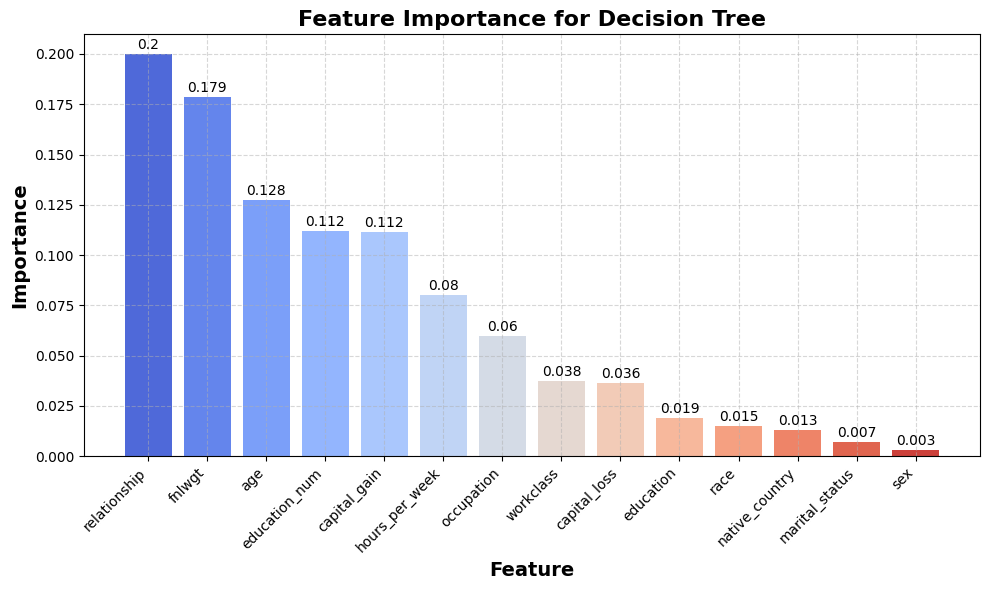

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Feature importance for Decision Tree
importances_dt = dt_clf.feature_importances_
indices_dt = np.argsort(importances_dt)[::-1]

# Create the figure for feature importance
plt.figure(figsize=(10, 6))

# Use a distinct color palette for the bars
colors = sns.color_palette("coolwarm", len(X.columns))

# Create the bar chart
bars = plt.bar(range(X_train.shape[1]), importances_dt[indices_dt], align="center", color=colors)

# Rotate the feature names on the x-axis for better readability
plt.xticks(range(X_train.shape[1]), X.columns[indices_dt], rotation=45, ha='right')

# Add labels and title with improved font properties
plt.xlabel('Feature', fontsize=14, weight='bold')
plt.ylabel('Importance', fontsize=14, weight='bold')
plt.title('Feature Importance for Decision Tree', fontsize=16, weight='bold')

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Add value labels above each bar for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.001, round(yval, 3), ha='center', va='bottom', fontsize=10)

# Tight layout to ensure labels do not overlap
plt.tight_layout()

# Show the plot
plt.show()


#Pie Chart

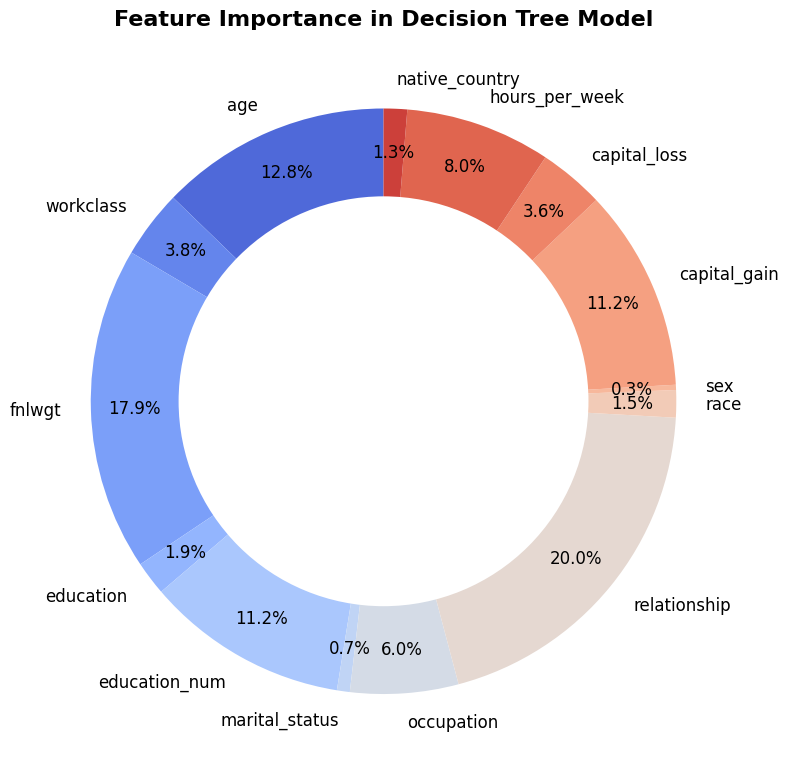

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance for Decision Tree
importances_dt = dt_clf.feature_importances_
features = X.columns

# Create a pie chart for feature importance with the "outclass" style
plt.figure(figsize=(8, 8))

# Using a color palette from Seaborn for better visual aesthetics
colors = sns.color_palette("coolwarm", len(features))

# Create the pie chart
plt.pie(importances_dt, labels=features, autopct='%1.1f%%', startangle=90,
        colors=colors, wedgeprops={'edgecolor': 'none'},  # Removed black borders
        textprops={'fontsize': 12, 'color': 'black'},
        pctdistance=0.85)  # Adjust the distance of percentage labels from the center

# Add a title with improved font properties
plt.title('Feature Importance in Decision Tree Model', fontsize=16, weight='bold')

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Add a center circle to make it look like a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Show the plot
plt.tight_layout()
plt.show()


#**ROC Curve Comparison**

566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


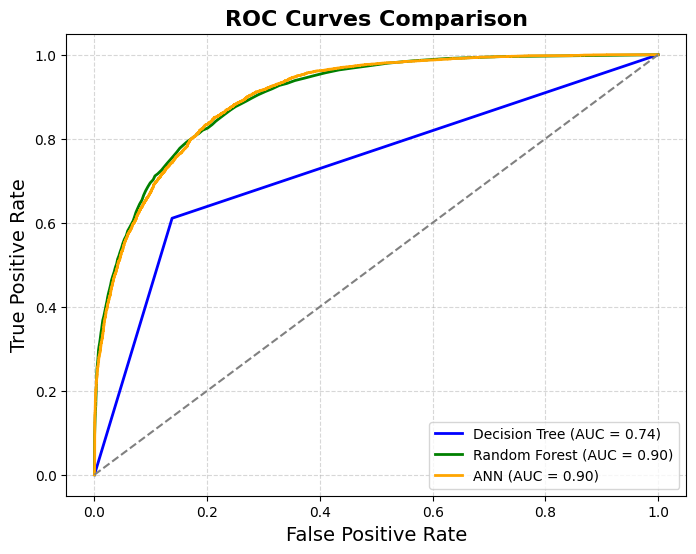

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

# ROC Curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_clf.predict_proba(X_test)[:,1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_clf.predict_proba(X_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# ROC Curve for ANN
fpr_ann, tpr_ann, _ = roc_curve(y_test, model.predict(X_test).ravel())
roc_auc_ann = auc(fpr_ann, tpr_ann)

# Plot ROC Curves for all models in one graph
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_ann, tpr_ann, color='orange', lw=2, label=f'ANN (AUC = {roc_auc_ann:.2f})')

# Plotting diagonal line for random classifier (chance level)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Labels and title
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC Curves Comparison', fontsize=16, weight='bold')
plt.legend(loc='lower right')
# Adding gridlines for better readability and precision
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


#**Precision-Recall Curve Comparison**

566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


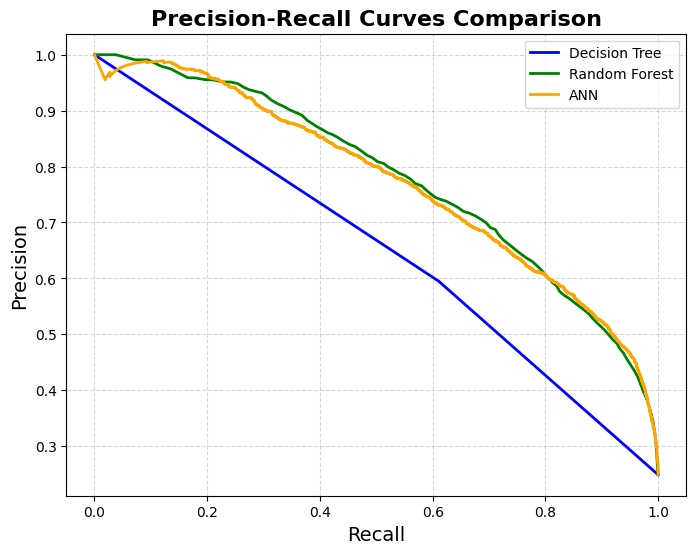

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

# Precision-Recall Curve for Decision Tree
precision_dt, recall_dt, _ = precision_recall_curve(y_test, dt_clf.predict_proba(X_test)[:, 1])

# Precision-Recall Curve for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_clf.predict_proba(X_test)[:, 1])

# Precision-Recall Curve for ANN
precision_ann, recall_ann, _ = precision_recall_curve(y_test, model.predict(X_test).ravel())

# Plot Precision-Recall Curves for all models in one graph
plt.figure(figsize=(8, 6))
plt.plot(recall_dt, precision_dt, color='blue', lw=2, label=f'Decision Tree')
plt.plot(recall_rf, precision_rf, color='green', lw=2, label=f'Random Forest')
plt.plot(recall_ann, precision_ann, color='orange', lw=2, label=f'ANN')

# Labels and title
plt.xlabel('Recall',fontsize=14)
plt.ylabel('Precision',fontsize=14)
plt.title('Precision-Recall Curves Comparison',fontsize=16, weight='bold')
plt.legend(loc='best')
# Adding gridlines for better readability and precision
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


#**Correlation Matrix Heatmap**

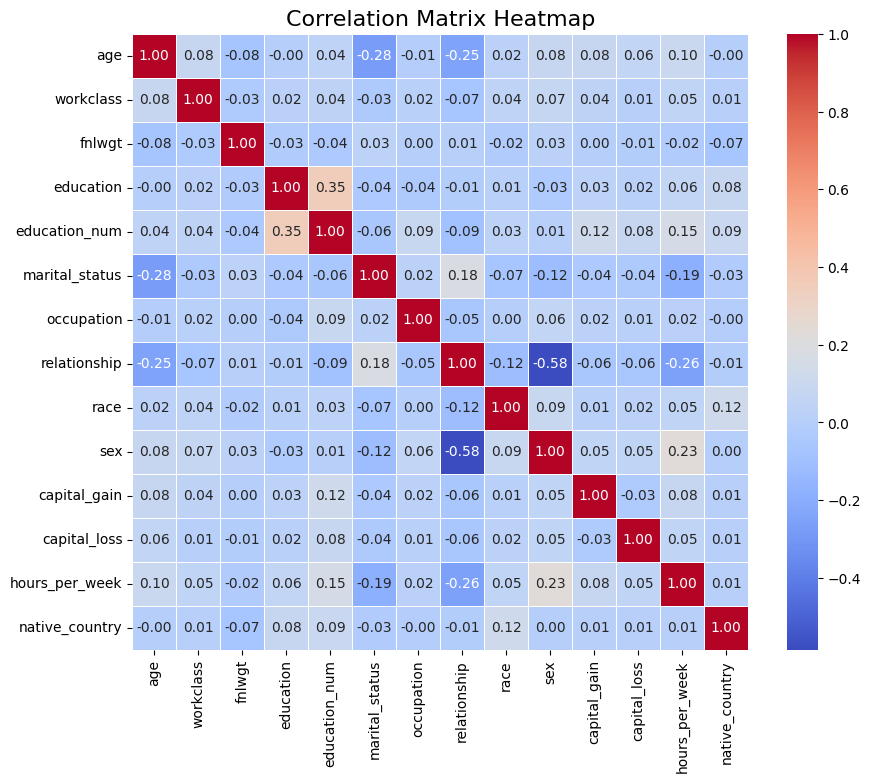

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)

# Title for the plot
plt.title('Correlation Matrix Heatmap',fontsize=16)

# Show the plot
plt.show()


#**Age Distribution by Income Class**

<ipython-input-110-9b92b05b1127>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X.loc[y==0, 'age'], shade=True, color="blue", label='<=50K')
<ipython-input-110-9b92b05b1127>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X.loc[y==1, 'age'], shade=True, color="orange", label='>50K')


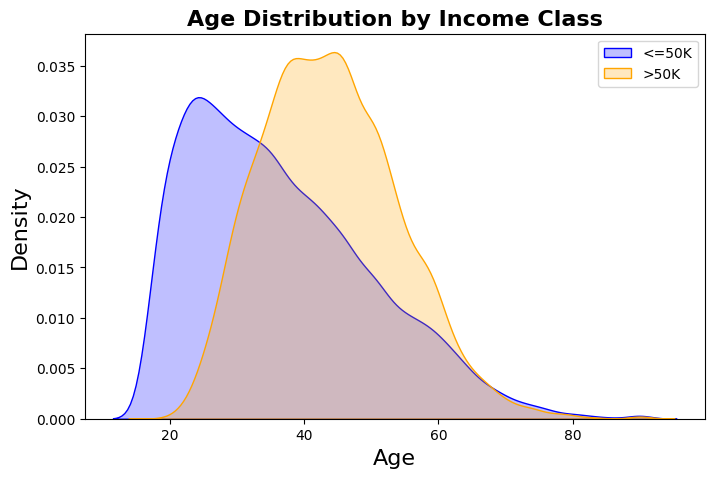

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(X.loc[y==0, 'age'], shade=True, color="blue", label='<=50K')
sns.kdeplot(X.loc[y==1, 'age'], shade=True, color="orange", label='>50K')
plt.title('Age Distribution by Income Class',fontsize=16, weight='bold')
plt.xlabel('Age',fontsize=16)
plt.ylabel('Density',fontsize=16)
plt.legend()
plt.show()
